In [11]:
pip install yfinance

     ---------------------------------------- 0.0/939.5 kB ? eta -:--:--
     -- ------------------------------------ 61.4/939.5 kB 1.1 MB/s eta 0:00:01
     ----------------- -------------------- 430.1/939.5 kB 5.3 MB/s eta 0:00:01
     --------------------------------- ---- 839.7/939.5 kB 5.9 MB/s eta 0:00:01
     -------------------------------------- 939.5/939.5 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/101.1 kB ? eta -:--:--
   ---------------------------------------- 101.1/101.1 kB 5.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
   ---------------------------------------- 112.2/112.2

In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

In [27]:
import yfinance as yf
sector_name = {'xlb':'BasicMaterials', 'xle':'Energy', 'xlf':'Financial', 'xli':'Industrial', 'xlk':'Technology', 'xlp':'ConsumerStaples'
               , 'xlu':'Utilities', 'xlv':'HealthCare', 'xly':'ConsumerDiscretionary'}

Symbol = ['xlv','xly','xlk','xlp','xlu','xlf','xli','xle','xlb'] 


start = '2023-10-01'
end = '2024-11-08'

# Price = web.get_data_yahoo(Symbol,start=start,end=end)
Price = yf.download(Symbol, start=start, end=end)

[*********************100%***********************]  9 of 9 completed


In [29]:
Price

Price                      Adj Close                                    \
Ticker                           XLB        XLE        XLF         XLI   
Date                                                                     
2023-10-02 00:00:00+00:00  75.993828  85.643051  32.359261   98.874329   
2023-10-03 00:00:00+00:00  75.787933  85.585045  31.847652   98.184898   
2023-10-04 00:00:00+00:00  76.680130  82.897530  32.083778   98.500061   
2023-10-05 00:00:00+00:00  75.748718  82.385155  32.231358   97.918961   
2023-10-06 00:00:00+00:00  76.464432  82.878197  32.506840   99.258438   
...                              ...        ...        ...         ...   
2024-11-01 00:00:00+00:00  93.129997  88.029999  46.639999  134.009995   
2024-11-04 00:00:00+00:00  93.540001  89.570000  46.279999  133.860001   
2024-11-05 00:00:00+00:00  93.680000  90.169998  46.709999  136.100006   
2024-11-06 00:00:00+00:00  94.970001  93.559998  49.549999  141.429993   
2024-11-07 00:00:00+00:00  95.339996  93.129997  48.750000  140.580002   

Price                                                                    \
Ticker                            XLK        XLP        XLU         XLV   
Date                                                                      
2023-10-02 00:00:00+00:00  164.468216  66.472366  54.399261  126.556702   
2023-10-03 00:00:00+00:00  161.678955  65.995750  55.028553  125.434471   
2023-10-04 00:00:00+00:00  163.693985  66.521004  54.970455  125.966057   
2023-10-05 00:00:00+00:00  163.912369  65.207893  54.650978  126.655151   
2023-10-06 00:00:00+00:00  166.979568  64.848000  55.425484  127.984108   
...                               ...        ...        ...         ...   
2024-11-01 00:00:00+00:00  223.910004  80.150002  78.129997  147.740005   
2024-11-04 00:00:00+00:00  223.740005  80.370003  77.199997  146.770004   
2024-11-05 00:00:00+00:00  226.889999  80.879997  78.360001  147.850006   
2024-11-06 00:00:00+00:00  233.350006  79.559998  77.550003  148.039993   
2024-11-07 00:00:00+00:00  237.419998  79.849998  77.690002  149.110001   

Price                                      Close  ...        Open    Volume  \
Ticker                            XLY        XLB  ...         XLY       XLB   
Date                                              ...                         
2023-10-02 00:00:00+00:00  159.798553  77.510002  ...  160.020004  11299400   
2023-10-03 00:00:00+00:00  155.910461  77.300003  ...  159.869995  13179000   
2023-10-04 00:00:00+00:00  158.985229  78.209999  ...  157.960007   8977000   
2023-10-05 00:00:00+00:00  158.191742  77.260002  ...  160.070007  10237200   
2023-10-06 00:00:00+00:00  159.302643  77.989998  ...  157.809998   8042900   
...                               ...        ...  ...         ...       ...   
2024-11-01 00:00:00+00:00  200.089996  93.129997  ...  200.509995   3464000   
2024-11-04 00:00:00+00:00  199.399994  93.540001  ...  199.250000   7654300   
2024-11-05 00:00:00+00:00  202.929993  93.680000  ...  199.850006   3986400   
2024-11-06 00:00:00+00:00  209.419998  94.970001  ...  207.550003   6351400   
2024-11-07 00:00:00+00:00  212.110001  95.339996  ...  209.830002   9974900   

Price                                                                        \
Ticker                          XLE        XLF       XLI      XLK       XLP   
Date                                                                          
2023-10-02 00:00:00+00:00  25299900   49350600  11079200  6828100  12642500   
2023-10-03 00:00:00+00:00  20733300   52921800  12055500  7419400  15396200   
2023-10-04 00:00:00+00:00  29786200   40136000  11394500  7597100  15125900   
2023-10-05 00:00:00+00:00  23518500   41407800  10336400  6011500  15757300   
2023-10-06 00:00:00+00:00  25728200   54048800  13842700  8310400  28722400   
...                             ...        ...       ...      ...       ...   
2024-11-01 00:00:00+00:00  13152300   40139900   7482300  5782900   7916100   
2024-11-04 00:0

In [31]:
Price = Price['Adj Close'].rename(sector_name, axis='columns')
#Price.rename(columns=sector_name, inplace=True)
daily_returns = Price.pct_change().dropna()

In [33]:
daily_returns  # เรียกดูตัวอย่างข้อมูล

Ticker,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,
2023-10-03 00:00:00+00:00,-0.002709,-0.000677,-0.015810,-0.006973,-0.016959,-0.007170,0.011568,-0.008867,-0.024331
2023-10-04 00:00:00+00:00,0.011772,-0.031402,0.007414,0.003210,0.012463,0.007959,-0.001056,0.004238,0.019721
2023-10-05 00:00:00+00:00,-0.012147,-0.006181,0.004600,-0.005899,0.001334,-0.019740,-0.005812,0.005470,-0.004991
2023-10-06 00:00:00+00:00,0.009449,0.005985,0.008547,0.013679,0.018712,-0.005519,0.014172,0.010493,0.007022
2023-10-09 00:00:00+00:00,0.001282,0.033360,0.000606,0.015678,0.005172,0.000900,0.009956,0.003461,0.001059
...,...,...,...,...,...,...,...,...,...
2024-11-01 00:00:00+00:00,-0.002784,-0.006321,0.003442,0.001345,0.007514,0.000374,-0.022275,0.005924,0.016253
2024-11-04 00:00:00+00:00,0.004402,0.017494,-0.007719,-0.001119,-0.000759,0.002745,-0.011903,-0.006566,-0.003448
2024-11-05 00:00:00+00:00,0.001497,0.006699,0.009291,0.016734,0.014079,0.006346,0.015026,0.007358,0.017703


Text(0.5, 1.0, 'Sector Correlation')

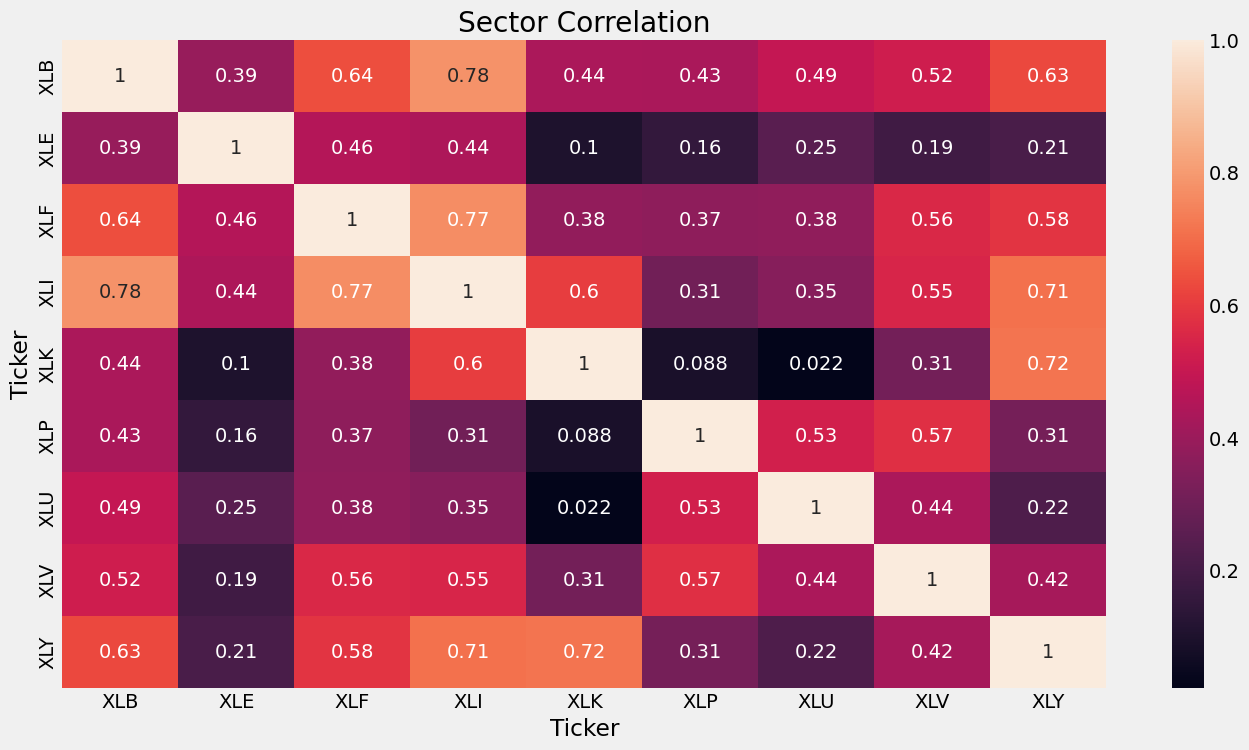

In [19]:
# calculate the correlation matrix
corr = daily_returns.corr()

# plot the heatmap
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, ).set_title("Sector Correlation")

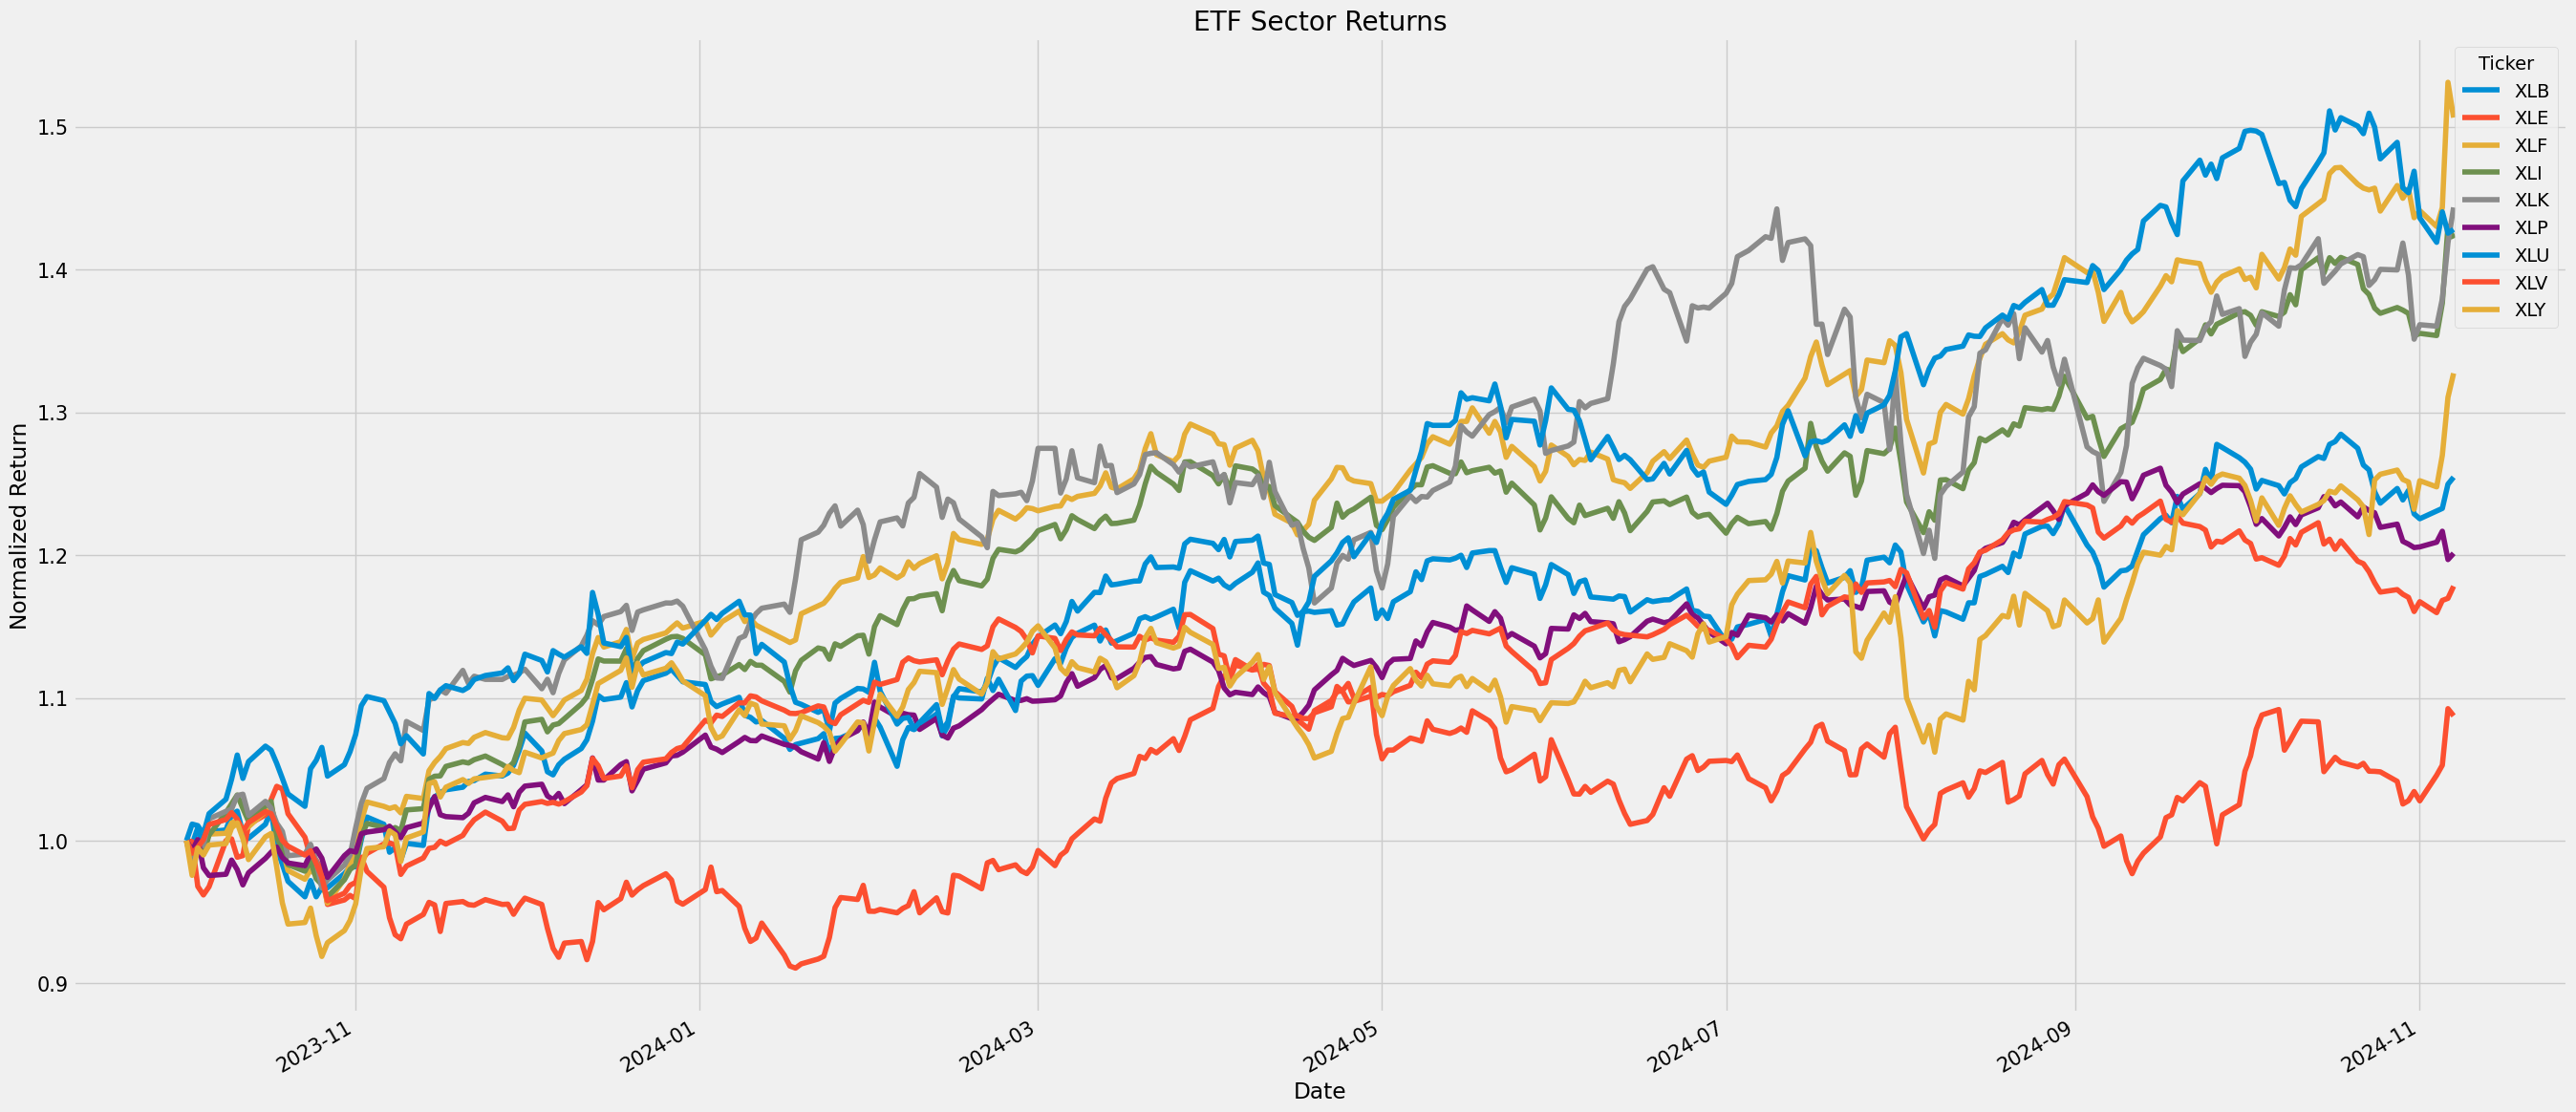

In [37]:
# etf_return = Price.apply(lambda x: x / x[0])
# etf_return.dropna().plot(figsize=(30,15))

# Rename columns based on the sector name dictionary
Price.rename(columns=sector_name, inplace=True)

# Calculate returns normalized to the first day
etf_return = Price.apply(lambda y: x / x.iloc[0])

# Drop NaN values and plot
etf_return.dropna().plot(figsize=(30, 15), title="ETF Sector Returns", fontsize=15)
plt.ylabel("Normalized Return")
plt.show()

Text(0.5, 1.0, 'Ranking Performance')

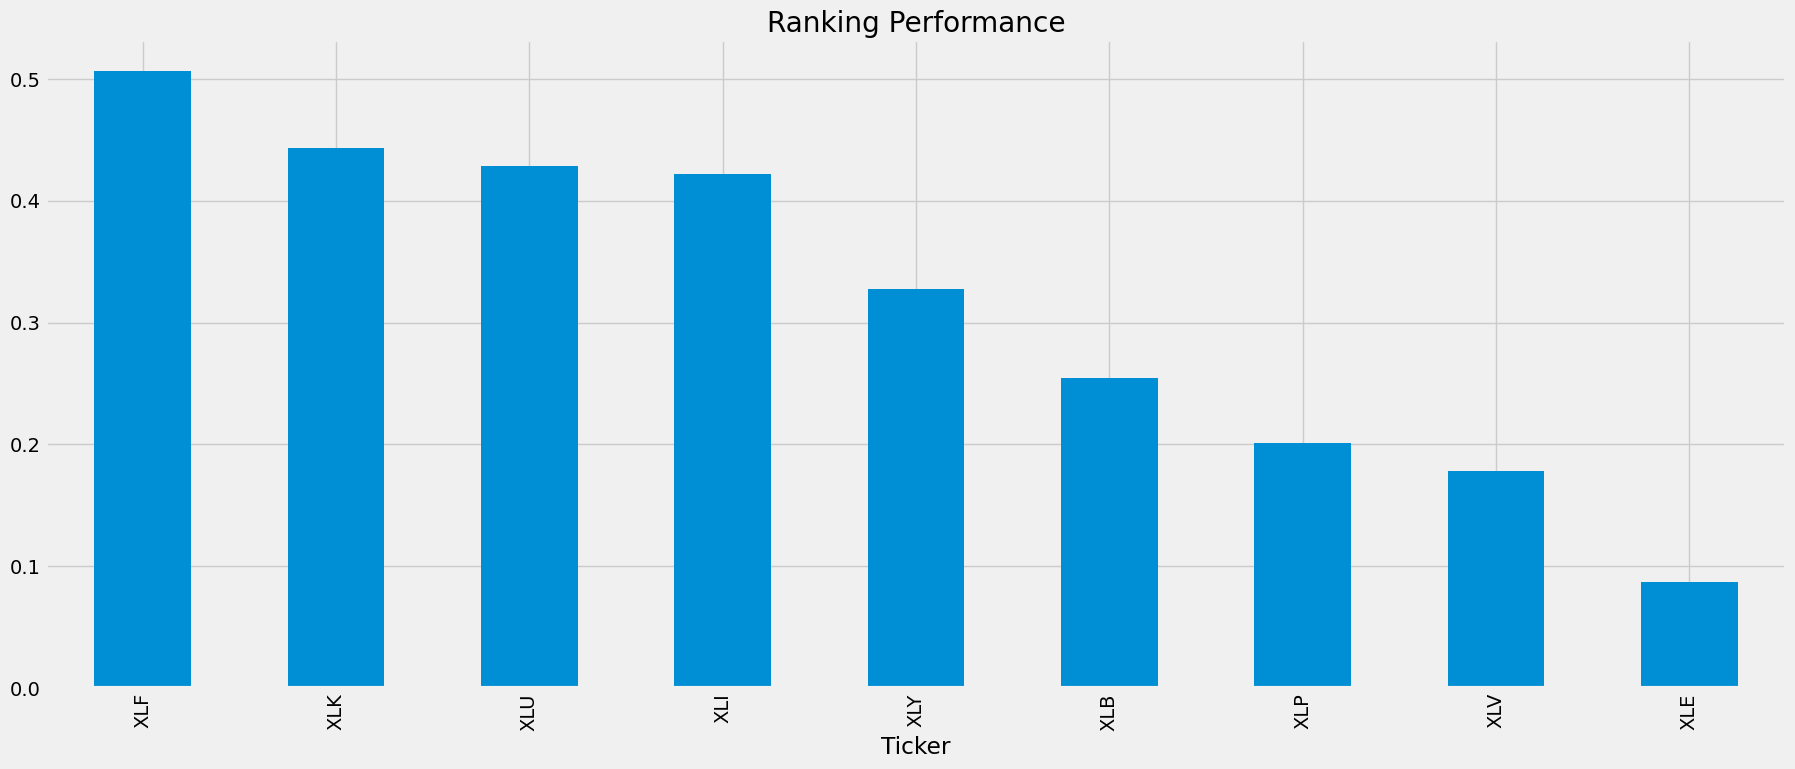

In [23]:
# calculate the correlation matrix
#ผลตอบแทนแต่ละ sector ถึงปัจจุบัน
return_rank = etf_return.iloc[-1].sort_values(ascending = False)-1
return_rank.plot.bar(figsize=(20,8)).set_title("Ranking Performance")

In [41]:
sector_name = {'xlb':'BasicMaterials', 'xle':'Energy', 'xlf':'Financial', 'xli':'Industrial', 'xlk':'Technology', 'xlp':'ConsumerStaples'
               , 'xlu':'Utilities', 'xlv':'HealthCare', 'xly':'ConsumerDiscretionary'}

Symbol = ['xlv','xly','xlk','xlp','xlu','xlf','xli','xle','xlb'] 


start = '2023-10-01'
end = '2024-11-08'

# Price = web.get_data_yahoo(Symbol,start=start,end=end)
Price = yf.download(Symbol, start=start, end=end)

Price = Price['Adj Close'].rename(sector_name, axis='columns')
daily_returns = Price.pct_change().dropna()

[*********************100%***********************]  9 of 9 completed


C:\Users\Lenovo T490s\AppData\Local\Temp\ipykernel_15620\3087447946.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  etf_return = Price.apply(lambda x: x / x[0])


<Axes: xlabel='Date'>

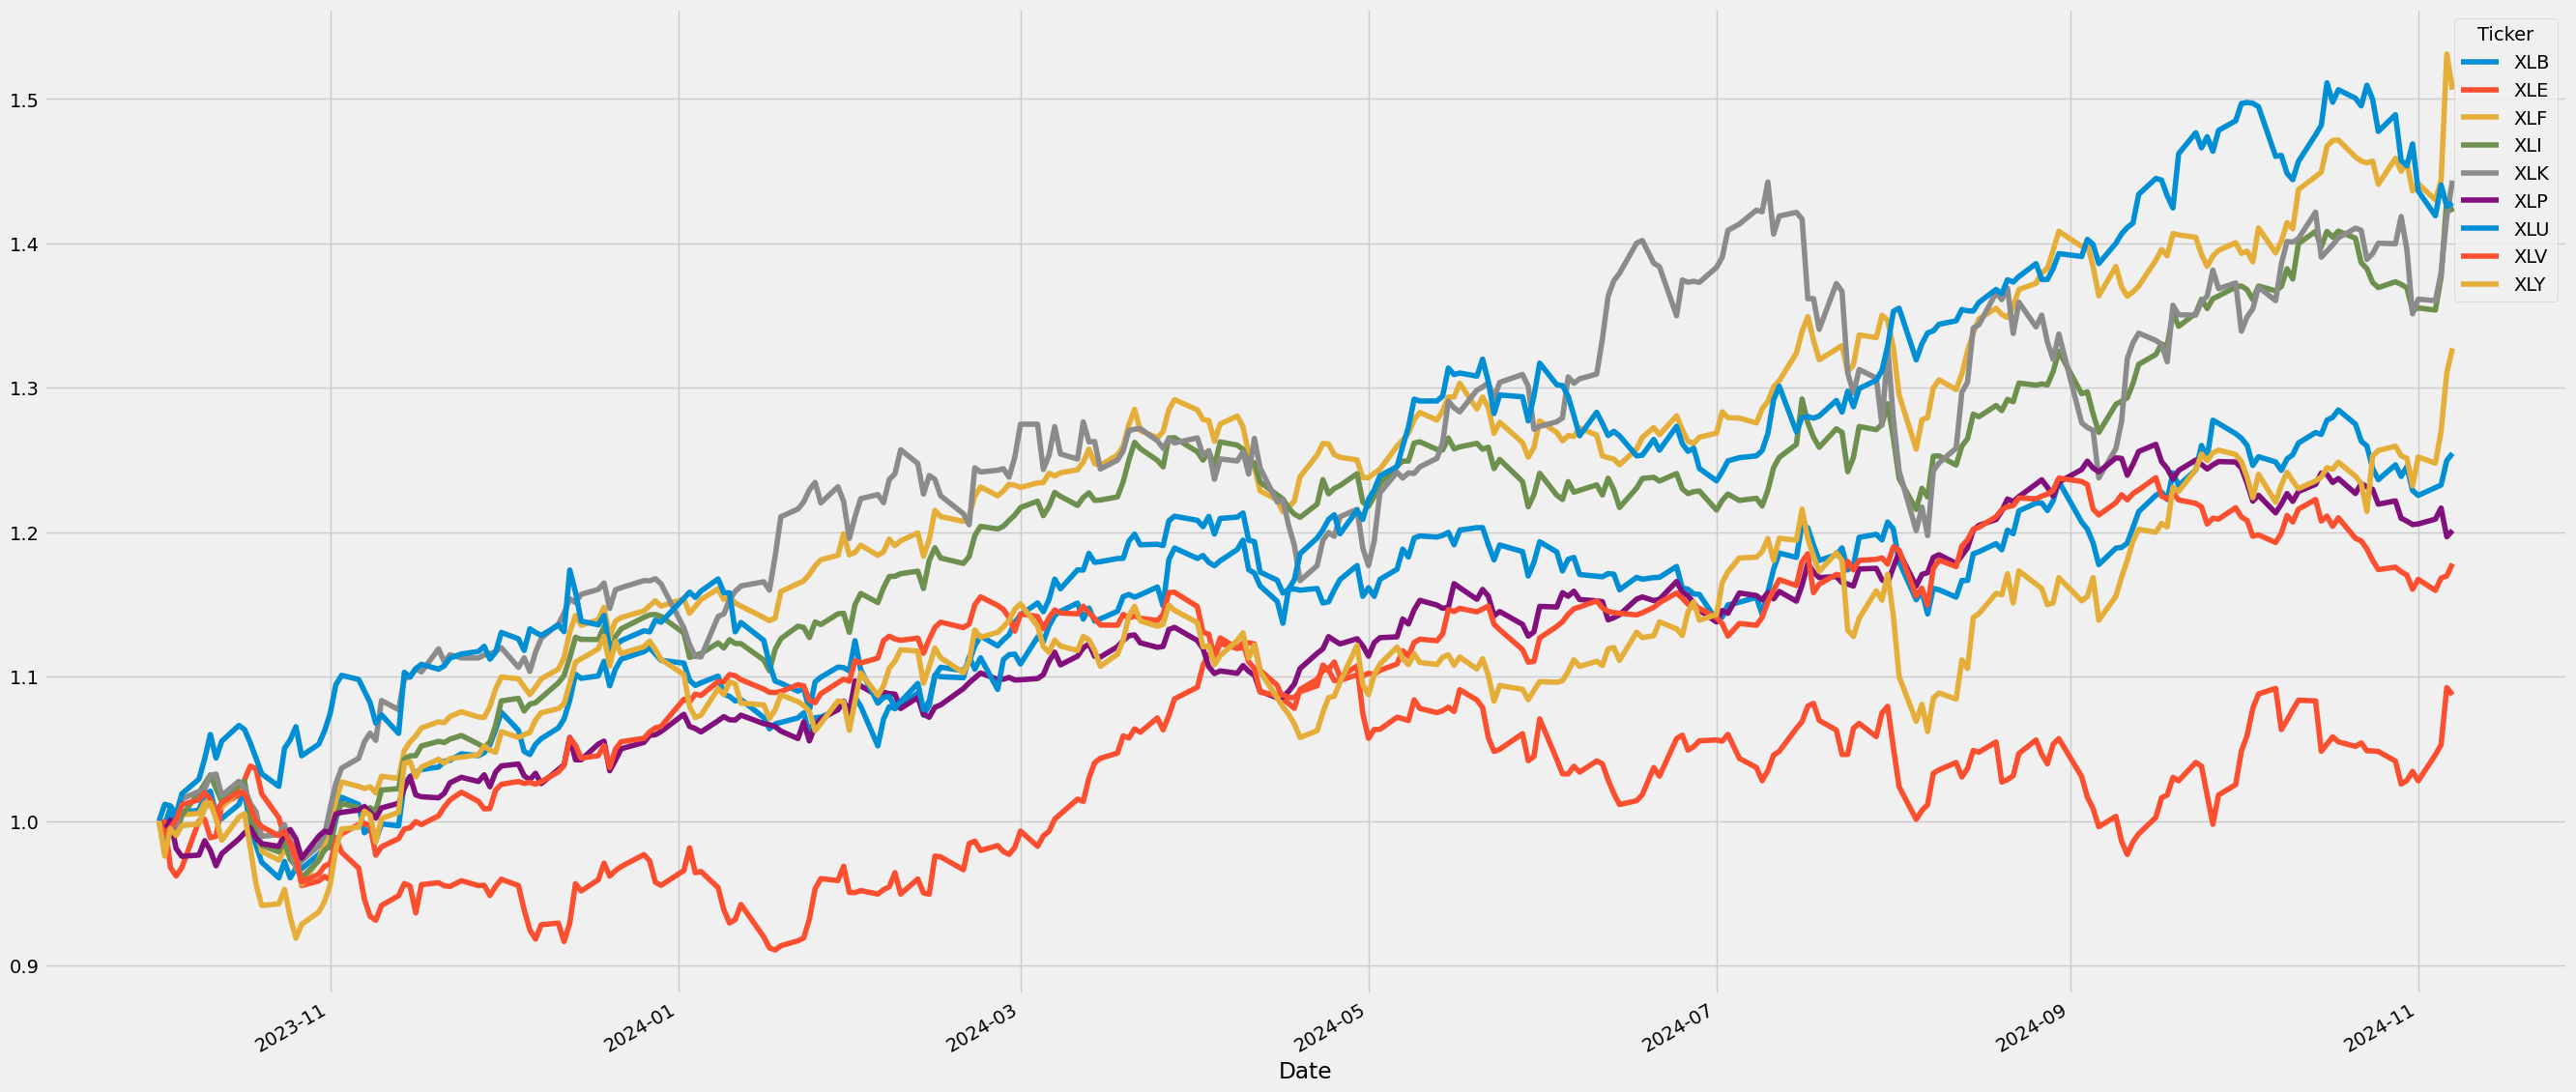

In [43]:
etf_return = Price.apply(lambda x: x / x[0])
etf_return.dropna().plot(figsize=(30,15))

Text(0.5, 1.0, 'Ranking Performance')

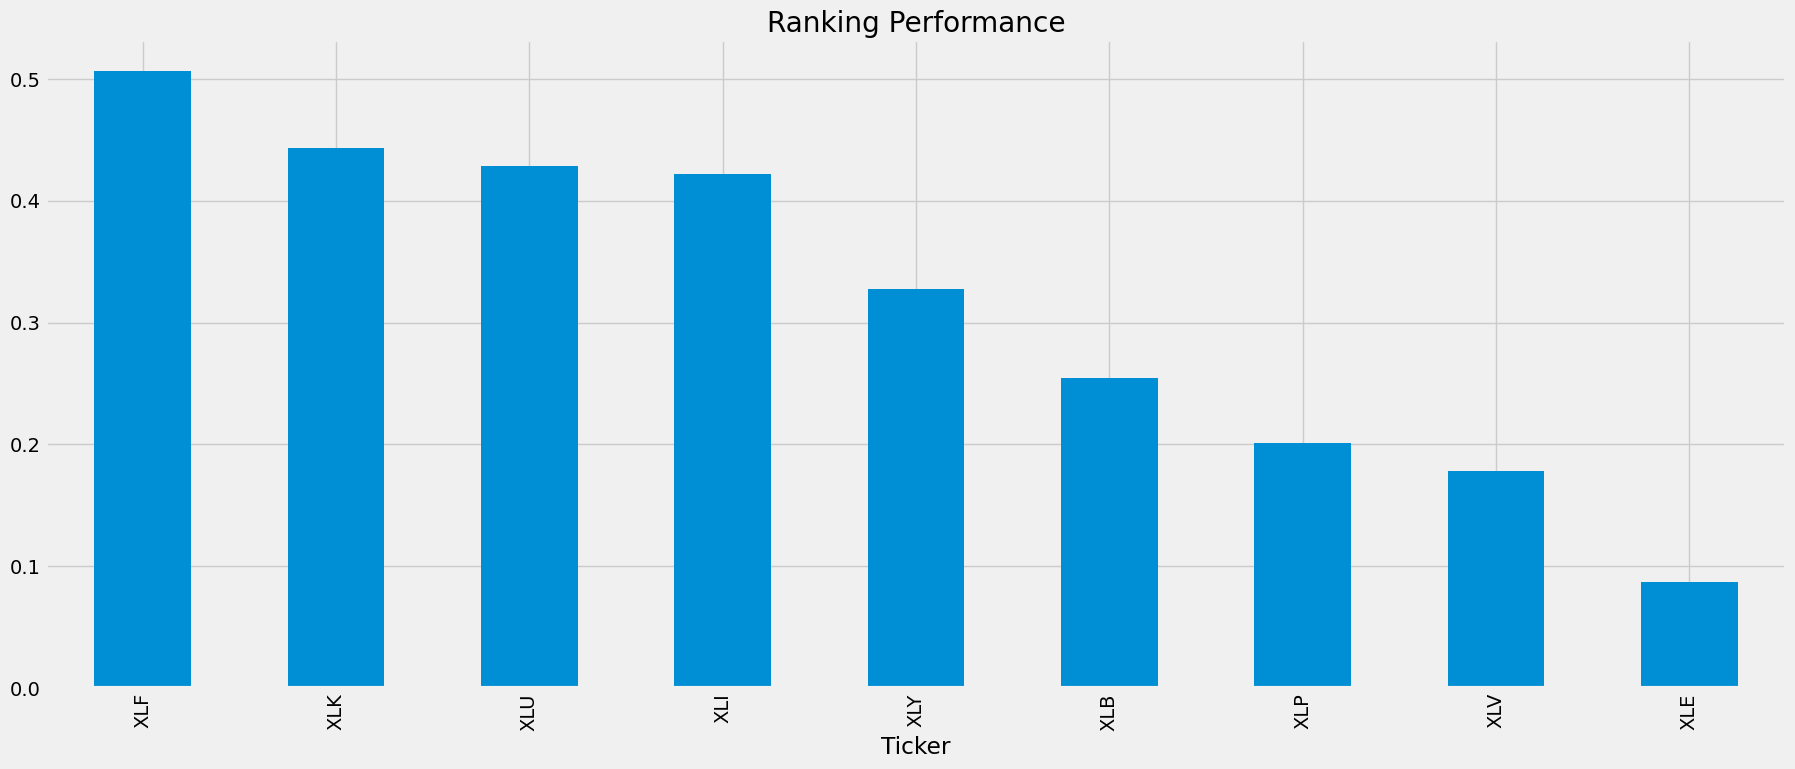

In [45]:
# calculate the correlation matrix
#ผลตอบแทนแต่ละ sector ถึงปัจจุบัน
return_rank = etf_return.iloc[-1].sort_values(ascending = False)-1
return_rank.plot.bar(figsize=(20,8)).set_title("Ranking Performance")

In [51]:
sector_name = {'xlb':'BasicMaterials', 'xle':'Energy', 'xlf':'Financial', 'xli':'Industrial', 'xlk':'Technology', 'xlp':'ConsumerStaples'
               , 'xlu':'Utilities', 'xlv':'HealthCare', 'xly':'ConsumerDiscretionary'}

Symbol = ['xlv','xly','xlk','xlp','xlu','xlf','xli','xle','xlb'] 


start = '2023-10-01'
end = '2024-11-08'

# Price = web.get_data_yahoo(Symbol,start=start,end=end)
Price = yf.download(Symbol, start=start, end=end)

Price = Price['Adj Close'].rename(sector_name, axis='columns')
daily_returns = Price.pct_change().dropna()

[*********************100%***********************]  9 of 9 completed


C:\Users\Lenovo T490s\AppData\Local\Temp\ipykernel_15620\3087447946.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  etf_return = Price.apply(lambda x: x / x[0])


<Axes: xlabel='Date'>

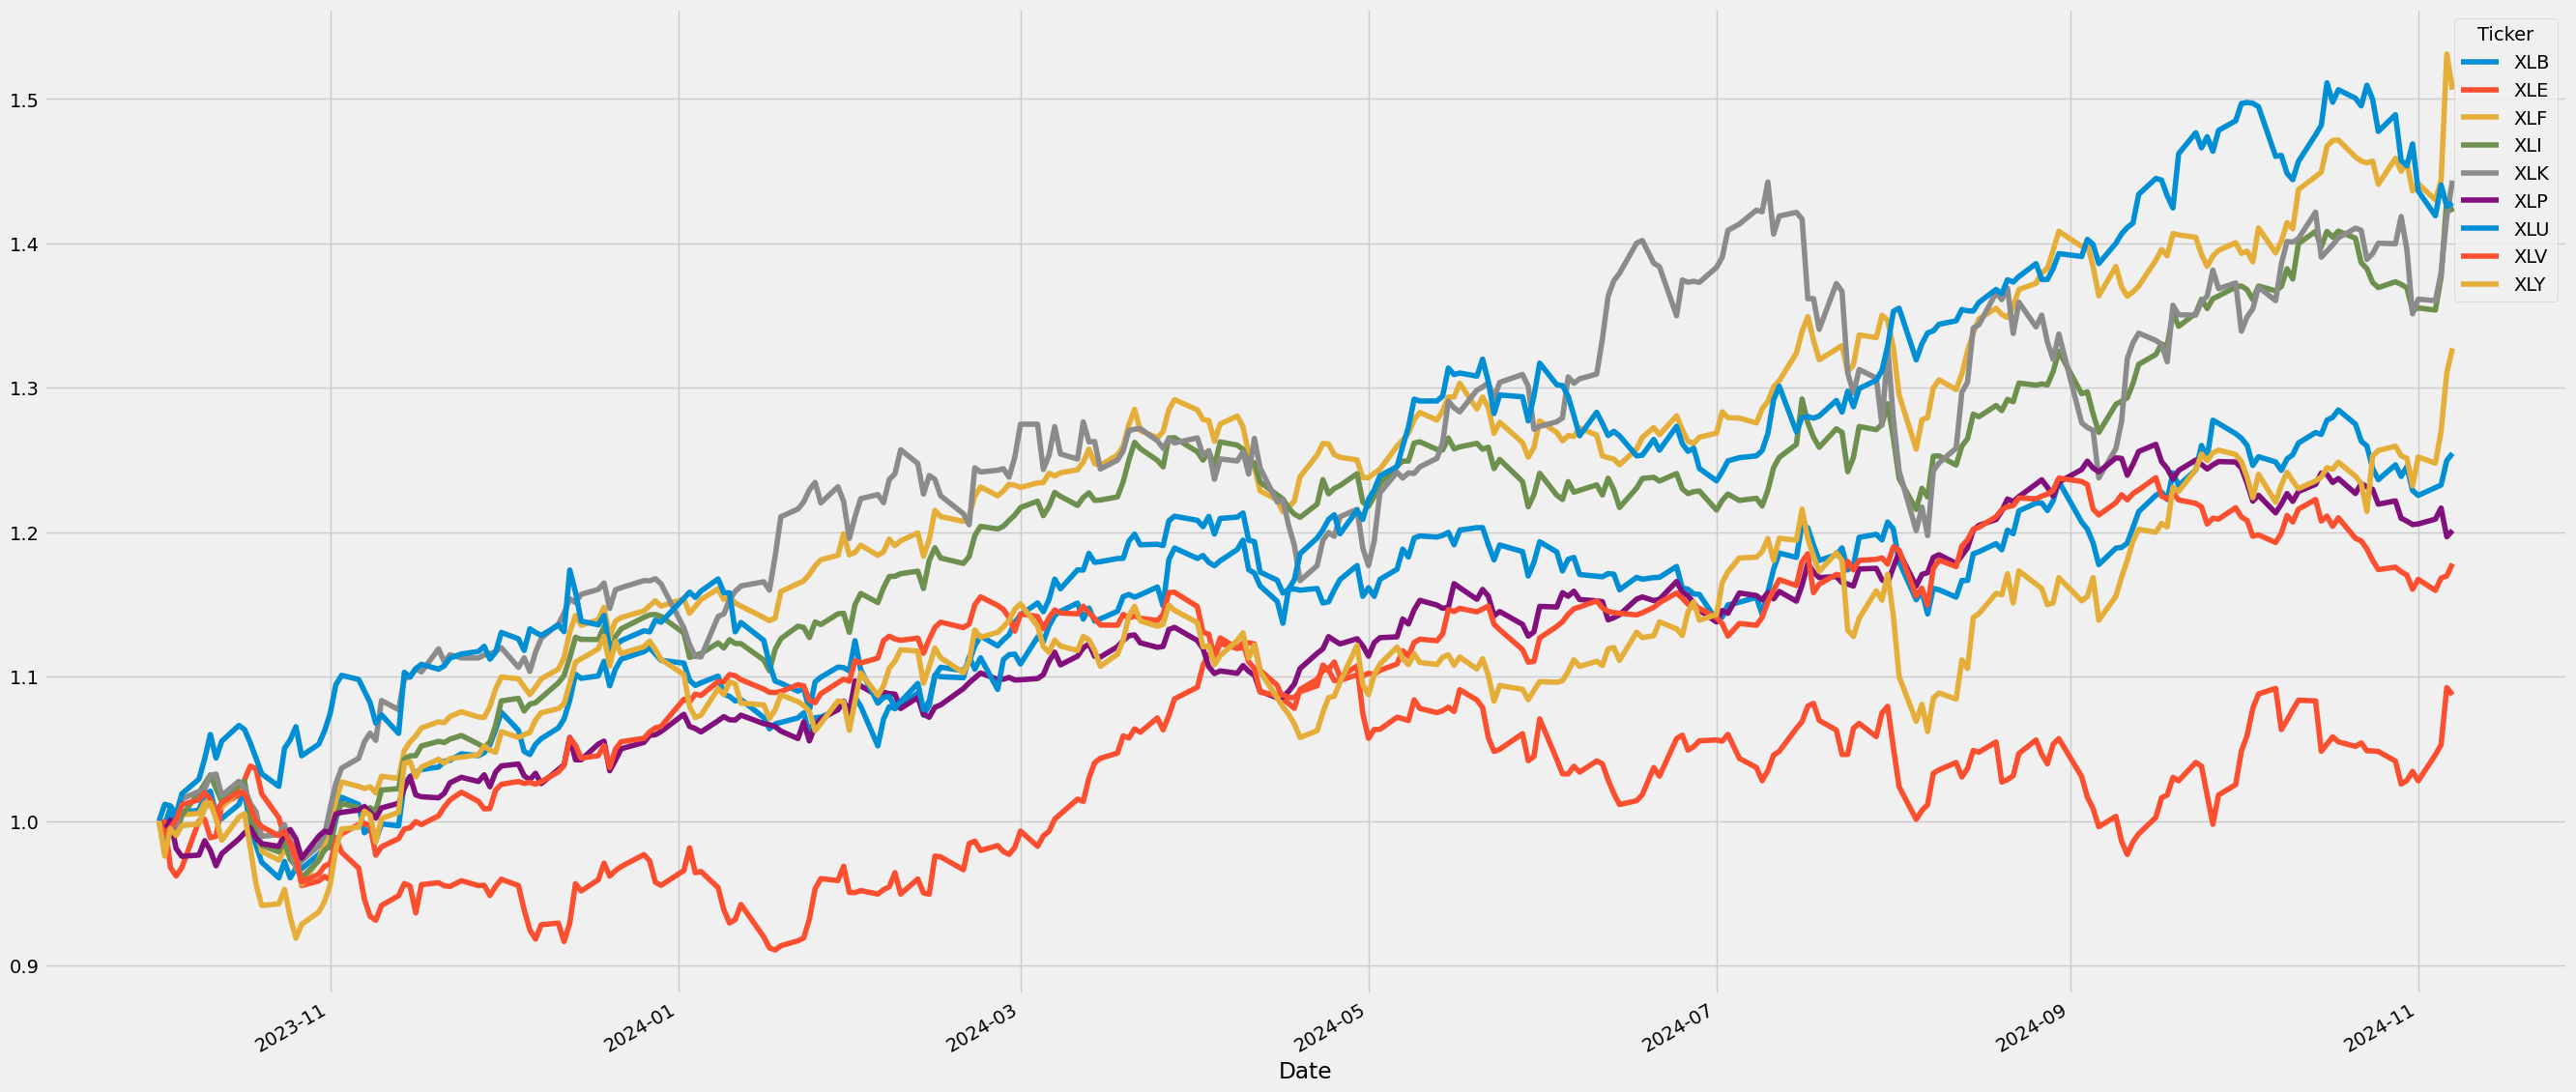

In [64]:
etf_return = Price.apply(lambda x: x / x[0])
etf_return.dropna().plot(figsize=(30,15))

Text(0.5, 1.0, 'Ranking Performance')

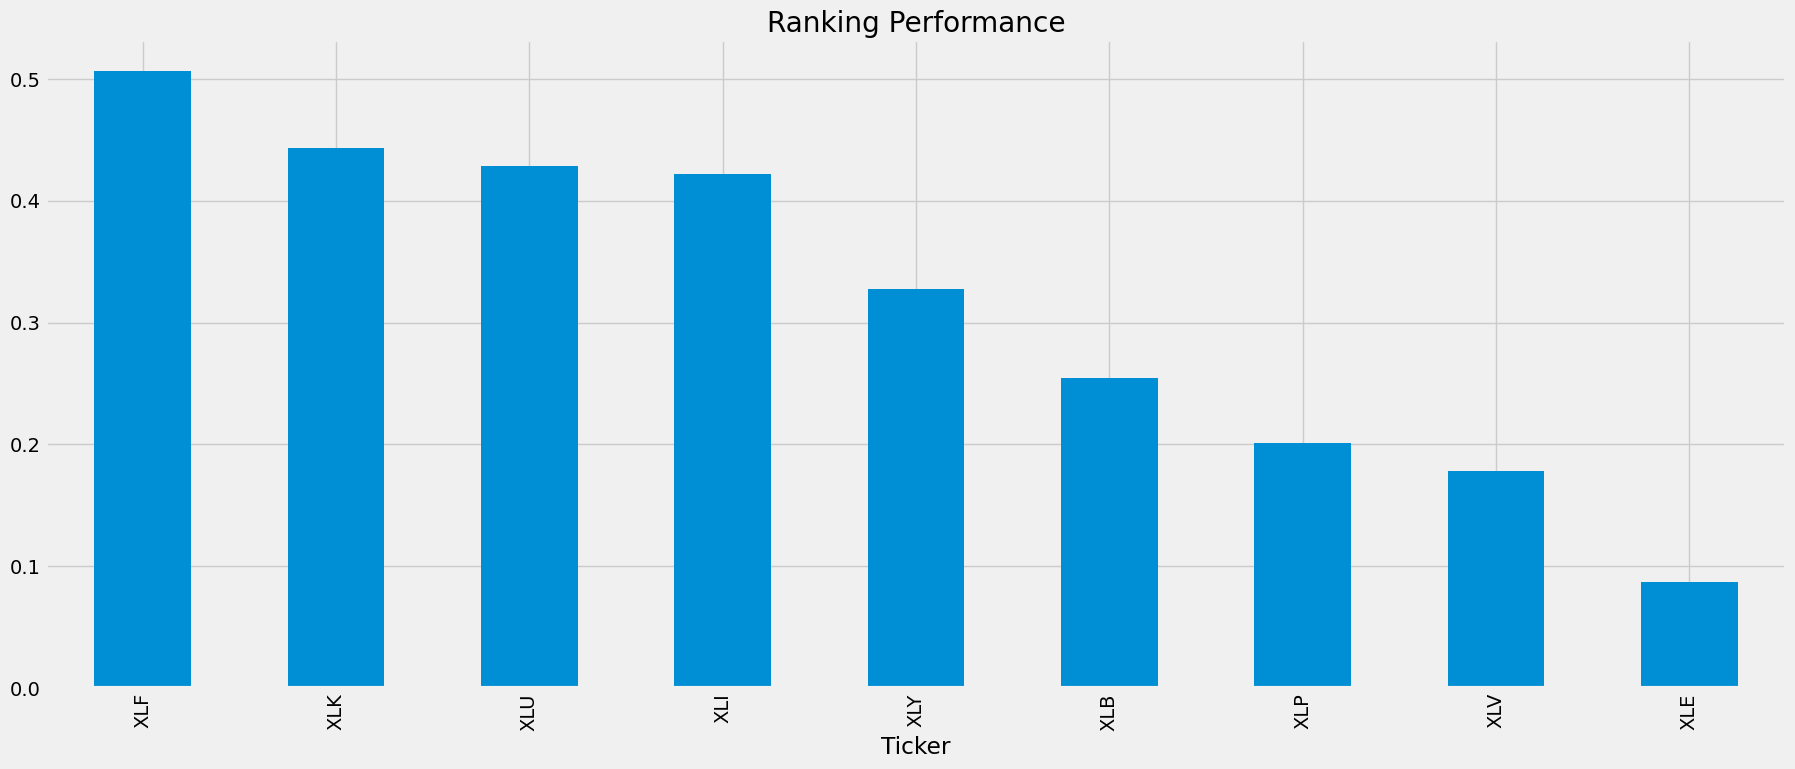

In [55]:
# calculate the correlation matrix
#ผลตอบแทนแต่ละ sector ถึงปัจจุบัน
return_rank = etf_return.iloc[-1].sort_values(ascending = False)-1
return_rank.plot.bar(figsize=(20,8)).set_title("Ranking Performance")